In [6]:
import yfinance as yf

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [8]:
current_date=pd.Timestamp.now()
maturity_date=current_date + pd.DateOffset(days=8) # Usually days = 7 as it contains 2 weekends and both first and last are included. days =8 if there is one more market day off other then weekends.
maturity_date

Timestamp('2025-06-20 06:18:08.915034')

In [9]:
ticker=yf.Ticker('SPY')
opt_detail = ticker.option_chain(maturity_date.strftime('%Y-%m-%d'))
calls=opt_detail.calls
puts=opt_detail.puts

In [10]:
end_date= pd.Timestamp.now()
start_date= end_date - pd.DateOffset(years=2)
spy=yf.download('SPY',start_date,end_date)
spy.head(2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2023-06-12,422.233765,422.311648,418.700575,419.430578,76104300
2023-06-13,425.017487,425.669606,423.041613,423.713218,95899700


In [11]:
current_price=(ticker.history(period = '1d')['Close']).iloc[-1]
current_price

np.float64(601.3599853515625)

In [12]:
drift_rate = ((spy['Close'].pct_change().sum())/(spy['Close'].pct_change().count())).iloc[-1
                                                                                          ]
drift_rate

np.float64(0.0007595877643754408)

In [13]:
volatility = (spy['Close'].pct_change().std()).iloc[-1]
vol = volatility * np.sqrt(252)

In [14]:
delta_T = (float)(1/252)

In [15]:
Num_simulations= 10000

In [16]:
N_steps = 6 # Number of Market Days between current Date and Maturity

In [17]:
!pip install fredapi

In [18]:
from fredapi import Fred

fred = Fred(api_key='0f20831928a8c94e2df17df8fdefe2e6')
r = fred.get_series('TB3MS').iloc[-1]
r

np.float64(4.25)

In [19]:
T = (float)(6/252)

# **Geometric Brownian Motion**

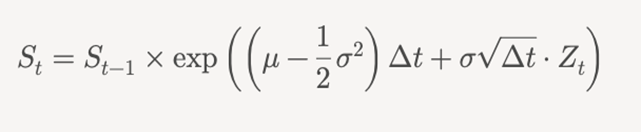

In [20]:
Maturity_price=[]
count=0
for i in range(0,Num_simulations):
  count+=1
  print(count)
  S = current_price
  path=[S]
  for step in range(0,N_steps):
    S = S * np.exp((drift_rate - (1/2)*vol*vol)*delta_T + vol*np.sqrt(delta_T)*np.random.normal(0, 1))
    path.append(S)
  Maturity_price.append(path)
# Maturity_price

Streaming output truncated to the last 5000 lines.
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190

In [21]:
import matplotlib.pyplot as plt

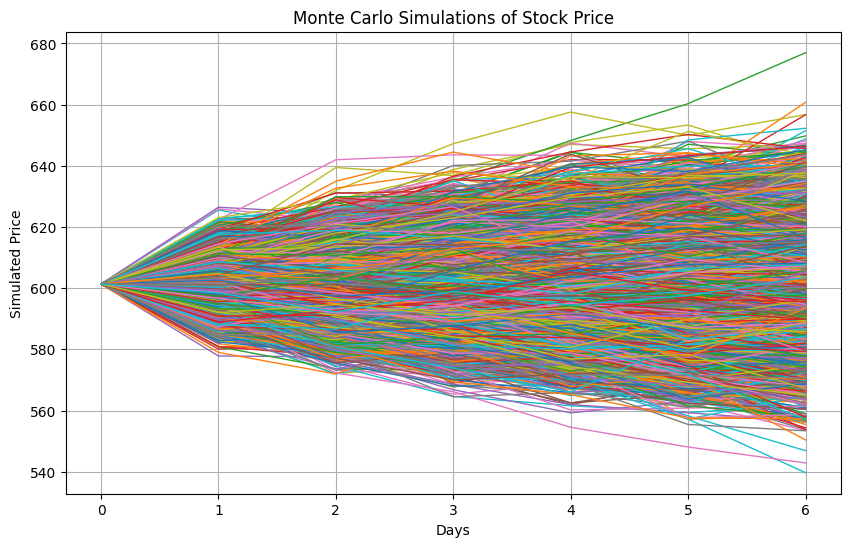

In [22]:
plt.figure(figsize=(10, 6))
for i in range(Num_simulations):
    plt.plot(Maturity_price[i], linewidth=1)

plt.title("Monte Carlo Simulations of Stock Price")
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.show()

## **Call Option:**

In [23]:
strike_price = calls[calls['strike'] == int(current_price)+1]['strike'].iloc[-1]
strike_price

np.float64(602.0)

In [24]:
calls[calls['strike'] == int(current_price)+1]['lastPrice']

,lastPrice
172,4.77


In [25]:
payoff = [max(float(p[-1] - strike_price), 0) for p in Maturity_price]
# payoff

In [26]:
Avg_payoff = (sum(payoff))/len(payoff)
Avg_payoff

5.608828037358951

In [27]:
Call_price = Avg_payoff*np.exp(-r*T)
Call_price

np.float64(5.069039315485758)

## **Conclusion**

Modeled Price = $5.29 (Num_Simulations=10000)

Actual Price = $4.35

As (Modeled Price > Actual), Hence the option is underpriced(good for buyers)

## **Put Option:**

In [28]:
strike_price = puts[puts['strike'] == int(current_price)+1]['strike'].iloc[-1]
strike_price

np.float64(602.0)

In [29]:
puts[puts['strike'] == int(current_price)+1]['lastPrice']

,lastPrice
172,5.8


In [30]:
payoff = [max(float(strike_price- p[-1]), 0) for p in Maturity_price]

In [31]:
Avg_payoff = (sum(payoff))/len(payoff)
Avg_payoff

6.535936328602746

In [32]:
Put_price = Avg_payoff*np.exp(-r*T)
Put_price

np.float64(5.906923512812746)

## **Conclusion**

Modeled Price = $5.77 (Num_Simulations=10000)

Actual Price = $4.68

As (Modeled Price > Actual), Hence the option is underpriced(good for buyers)